In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

from spyglass.common import Session
from spyglass.decoding.v1.clusterless import ClusterlessDecodingV1
from spyglass.decoding.v1.sorted_spikes import SortedSpikesDecodingV1

import os
os.chdir("..")
from Analysis.utils import filter_opto_data, smooth
from ms_opto_stim_protocol import OptoStimProtocol


[2024-06-03 09:29:56,664][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2024-06-03 09:29:56,719][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306


## Winnie lineartrack theta 90

In [23]:
Decoder = ClusterlessDecodingV1
Decoder = SortedSpikesDecodingV1


dataset_key = {
    "animal": "Winnie",
    "targeted_phase": 90,
    "track_type": "lineartrack",
    "min_pulse_length": 20,
}
filter_opto_data(dataset_key)

interval = "pos 11 valid times"
encoding_tag = ""  # "_opto_control_interval"
causal_tag = ""  # "_causal"
key = {
    "nwb_file_name": "Winnie20220717_.nwb",
    "position_group_name": interval,
    "encoding_interval": interval + encoding_tag,
}
key = (
    (Decoder() & key)
    & f"decoding_param_name LIKE '%{causal_tag}'"
    & "sorted_spikes_group_name NOT LIKE 'manual%'"
).fetch1("KEY")

pos_df = Decoder().fetch_linear_position_info(key)
results = (Decoder() & key).fetch_results()
posterior = results.acausal_posterior.unstack("state_bins").sum("state")[0]
decode_pos = posterior.idxmax("position").values

opto_key = {
    "nwb_file_name": "Winnie20220717_.nwb",
    "interval_list_name": interval,
}
stim, stim_time = OptoStimProtocol().get_stimulus(opto_key)

linear_pos = pos_df["linear_position"].values

if "sorted" in Decoder.full_table_name:
    spikes = Decoder().fetch_spike_data(key)
else:
    spikes = Decoder().fetch_spike_data(key)[0]
flat_spikes = np.concatenate(spikes)
spike_inds = np.digitize(flat_spikes, pos_df.index.values)
mua = np.bincount(spike_inds, minlength=len(pos_df))
mua = smooth(mua, 5)

datasets: 2


[10:44:04][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[10:44:04][WARNING] Spyglass: Multiple classes found in stack: {'`position_merge`.`position_output`', '`position_v1_trodes_position`.`__trodes_pos_v1`'}. Please submit a bug report with the snippet used.
[10:44:06][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[10:44:06][WARNING] Spyglass: Multiple classes found in stack: {'`position_merge`.`position_output`', '`position_v1_trodes_position`.`__trodes_pos_v1`'}. Please submit a bug report with the snippet used.
[2024-05-30 10:44:11,626][WARNING]: Skipped checksum for file with hash: 9d8a5a49-96aa-de26-7e0c-7f0069c6677d, and path: /stelmo/nwb/raw/Winnie20220717_.nwb
[10:44:12][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`'}. Please submit a bug report with the snippet used.


In [4]:
# len(Decoder().fetch_spike_data(key,filter_by_interval=False))
Decoder & key

nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters,results_path path to the results file,classifier_path path to the classifier file
Winnie20220717_.nwb,default_exclusion,12_lineartrack,pos 11 valid times,ms_lineartrack_contfrag_sorted,pos 11 valid times,pos 11 valid times,0,=BLOB=,=BLOB=


In [5]:
# from uuid import UUID
# merge_ids = ["fd18b5b5-7f7d-f37e-760f-678acc4d4791", "2999aa1a-da91-4e71-0267-32e5731d2c09"]
# merge_ids = [{"merge_id":id} for id in merge_ids]

# from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput

# part_key = (SpikeSortingOutput().CuratedSpikeSorting() & merge_ids[0]).fetch(as_dict=True)[0]

# part_key.pop("merge_id")
# SpikeSortingOutput().CuratedSpikeSorting() & part_key

In [6]:
# from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput
# part_key = {
#     "curation_id": 1,
#     "nwb_file_name": "Winnie20220717_.nwb",
#     "sort_group_id": 13,
#     "sort_interval_name": "12_lineartrack",
#     "preproc_params_name": "franklab_tetrode_hippocampus",
#     "team_name": "ms_stim",
#     "sorter": "mountainsort4",
#     "sorter_params_name": "franklab_tetrode_hippocampus_30KHz_tmp",
#     "artifact_removed_interval_list_name": "Winnie20220717_.nwb_12_lineartrack_13_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times",
# }
# SpikeSortingOutput.insert([part_key],part_name="CuratedSpikeSorting")#, skip_duplicates=True)
# # SpikeSortingOutput().CuratedSpikeSorting() & part_key

In [7]:
# import datajoint as dj
# dj.hash.key_hash(part_key | {"source": "CuratedSpikeSorting"})

In [8]:
# ref = 4
# for i in range(len(place_fields)):
#     if not len(place_fields[i]) == len(place_fields[ref]):
#         continue
#     if np.sum(place_fields[i]-place_fields[ref]) == 0:
#         print(i)
#         # break

[140001 140002 140003 140004 140005 140006 140007 140008 140009 140010
 140011 140012 140013 140014 140015 140016 140017 140018 140019 140020
 140021 140022 140023 140024 140025 140026 140027 140028 140029 140030
 140031 140032 140033 140034 140035 140036 140037 140038 140039 140040
 140041 140042 140043 140044 140045 140046 140047 140048 140049 140050
 140051 140052 140053 140054 140055 140056 140057 140058 140059 140060
 140061 140062 140063 140064 140065 140066 140067 140068 140069 140070
 140071 140072 140073 140074 140075 140076 140077 140078 140079 140080
 140081 140082 140083 140084 140085 140086 140087 140088 140089 140090
 140091 140092 140093 140094 140095 140096 140097 140098 140099 140100
 140101 140102 140103 140104 140105 140106 140107 140108 140109 140110
 140111 140112 140113 140114 140115 140116 140117 140118 140119 140120
 140121 140122 140123 140124 140125 140126 140127 140128 140129 140130
 140131 140132 140133 140134 140135 140136 140137 140138 140139 140140
 14014

(-8.0, 1.0)

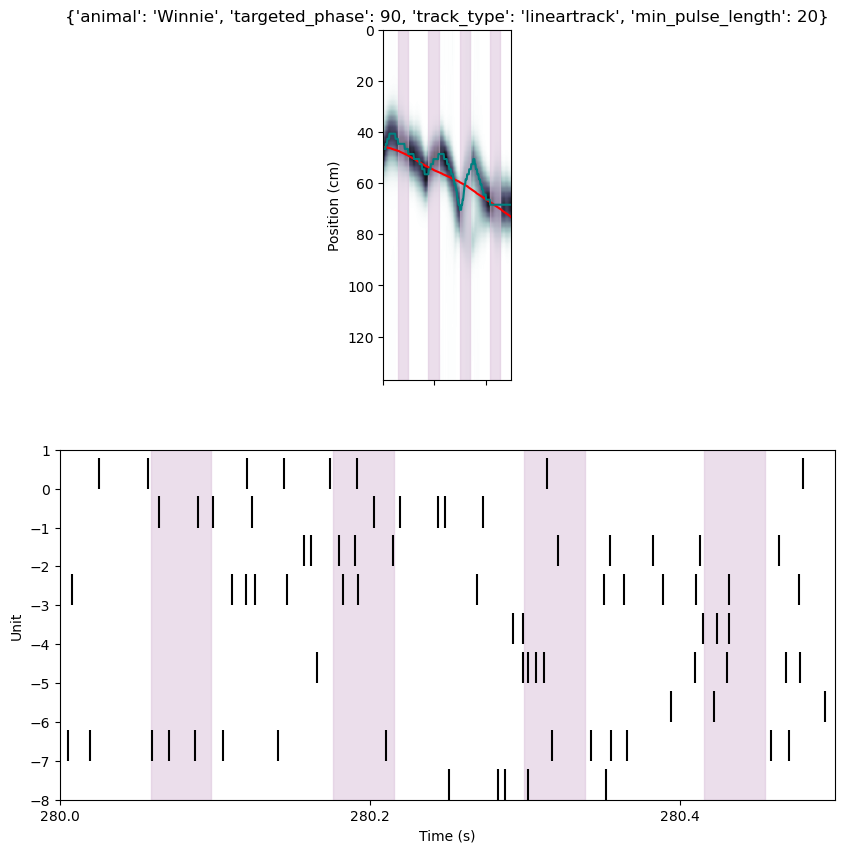

In [31]:
# pos_df
posterior.shape, pos_df.shape

t0 = pos_df.index.values[0]
# st = 275
# t_rng = (st, st+12)

st = 279  # - 19
t_rng = (st, st + 2.7)

t_rng = (280, 280.5)

# st=280.6
# t_rng=(st,281.7)
# st = 504 #- 19
# t_rng = (st, st+3)


# fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
ind = np.where(
    (pos_df.index.values >= t0 + t_rng[0]) & (pos_df.index.values < t0 + t_rng[1])
)[0]
print(ind)
ax[0].imshow(
    posterior[ind].T, aspect=0.01, extent=[*t_rng, linear_pos.max(), 0], cmap="bone_r"
)
ax[0].plot(pos_df.index[ind].values - t0, linear_pos[ind], "r")
ax[0].plot(pos_df.index[ind].values - t0, decode_pos[ind], "teal")


stim_ind = np.where((stim_time >= t0 + t_rng[0]) & (stim_time < t0 + t_rng[1]))[0]
for i in range(len(stim_ind)):
    if i == 0 and stim[stim_ind[i]] == 0:
        ax[0].fill_betweenx(
            [0, linear_pos.max()],
            t0,
            stim_time[stim_ind[i]] - t0,
            color="thistle",
            alpha=0.5,
        )
    elif stim[stim_ind[i]] == 1:
        ax[0].fill_betweenx(
            [0, linear_pos.max()],
            stim_time[stim_ind[i]] - t0,
            stim_time[stim_ind[i + 1]] - t0,
            color="thistle",
            alpha=0.5,
        )


ax[1].set_xlabel("Time (s)")
ax[0].set_ylabel("Position (cm)")
ax[0].set_title(dataset_key)


j = 0
for ii, s_ind in enumerate(neuron_sort_ind[::]):
    spike_times = spikes[s_ind]

    marks = (
        spike_times[
            np.logical_and(spike_times >= t0 + t_rng[0], spike_times < t0 + t_rng[1])
        ]
        - t0
    )
    if marks.size < 3 or marks.size > 50:
        continue
    ax[1].vlines(marks, j, j + 0.8, color="k")
    j -= 1

for i in range(len(stim_ind)):
    if i == 0 and stim[stim_ind[i]] == 0:
        ax[1].fill_betweenx(
            [1, j + 1], t0, stim_time[stim_ind[i]] - t0, color="thistle", alpha=0.5
        )
    elif stim[stim_ind[i]] == 1:
        ax[1].fill_betweenx(
            [1, j + 1],
            stim_time[stim_ind[i]] - t0,
            stim_time[stim_ind[i + 1]] - t0,
            color="thistle",
            alpha=0.5,
        )
ax[1].set_ylabel("Unit")
ax[1].set_ylim(j + 1, 1)

In [60]:
len(neuron_sort_ind), len(spikes), place_fields.shape

(88, 224, (112, 69))

In [5]:
classifier = (Decoder & key).fetch_model()
classifier.encoding_model_
for encoding_model in classifier.encoding_model_:
    place_fields = np.asarray(
        classifier.encoding_model_[encoding_model]["place_fields"]
    )
    norm_place = place_fields / np.mean(place_fields, axis=1)[:, None]
    ind_plot = np.where(norm_place.max(axis=1) > 1.5)[0]
# place_fields = np.asarray(
#     classifier.encoding_model_[encoding_model]["place_fields"]
# )
neuron_sort_ind = np.argsort(np.nanargmax(place_fields, axis=1).squeeze())
neuron_sort_ind = [x for x in neuron_sort_ind if x in ind_plot]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


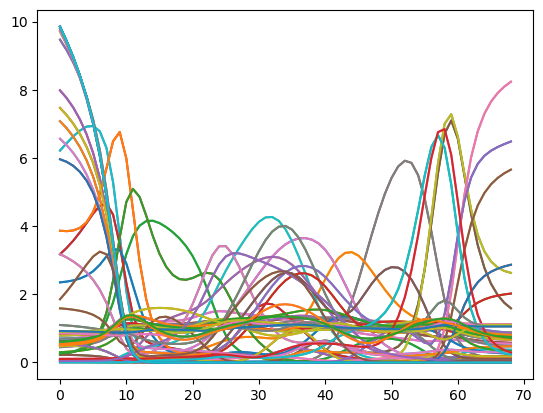

In [35]:
plt.plot(place_fields[0])
norm_place = place_fields / np.mean(place_fields, axis=1)[:, None]
plt.plot(norm_place.T)

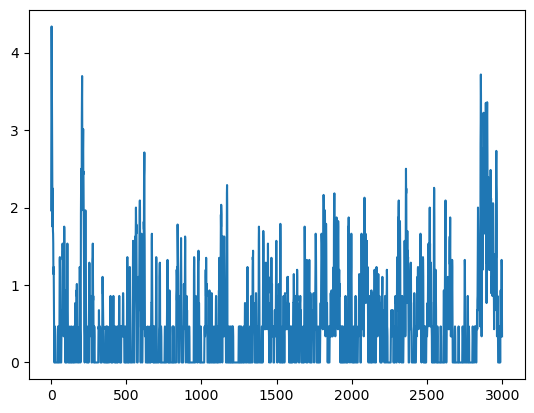

In [4]:
plt.plot(mua[:3000])
# mua.shape
# np.where(mua>0)[0].size, np.unique(spike_inds).size

In [93]:
states = results.acausal_posterior.unstack("state_bins").state.values
state_probabilities = results.acausal_posterior.unstack("state_bins").sum("position")[0]

t_on = stim_time[stim == 1]
ind_on = np.digitize(t_on, pos_df.index.values)
plot_ind = np.arange(-50, 50, 1)

fig, ax = plt.subplots(
    nrows=state_probabilities.shape[-1] + 1, sharex=True, figsize=(6, 10)
)
for i, a in enumerate(ax[1:]):
    state_response = np.array([state_probabilities[ind + plot_ind] for ind in ind_on])
    yy = np.mean(state_response, axis=0)[:, i]
    lo = yy.min() * 0.99
    hi = yy.max() * 1.01
    a.plot(plot_ind * 2, yy)
    a.set_ylabel(f"mean Probability ({states[i]})")
    a.fill_between([0, 40], [lo] * 2, [hi] * 2, color="thistle", alpha=0.5)

# add mua
mua_plot = np.array([mua[ind + plot_ind] for ind in ind_on])
yy = np.mean(mua_plot, axis=0)
lo = yy.min() * 0.99
hi = yy.max() * 1.01
ax[0].plot(plot_ind * 2, yy)
# ax[0].fill_between(plot_ind*2,[lo]*len(plot_ind),[hi]*len(plot_ind), color='thistle', alpha=0.5)
ax[0].set_ylabel("MUA")
ax[0].fill_between([0, 40], [lo] * 2, [hi] * 2, color="thistle", alpha=0.5)


for a in ax:
    a.spines[["top", "right"]].set_visible(False)
plt.xlabel("time since stim on (ms)")
# plt.title('dataset_key')
# plt.

Text(0.5, 0, 'time since stim on (ms)')

### Find peak mua times


In [6]:
# %matplotlib qt
# # plt.plot(pos_df.index.values-t0,mua)

pos_df.speed.max()
avg_speed = []
percent_neurons = []
t_on = []

for i, state in enumerate(stim):
    if not state:
        continue
    time_rng = [stim_time[i], stim_time[i + 1]]
    # print(time_rng[1]-time_rng[0])
    ind = np.logical_and(
        pos_df.index.values > time_rng[0], pos_df.index.values < time_rng[1]
    )
    avg_speed.append(pos_df.loc[ind].speed.mean())
    percent_neurons.append(
        np.mean(
            [
                len(
                    spike_times[
                        np.logical_and(
                            spike_times >= time_rng[0], spike_times < time_rng[1]
                        )
                    ]
                )
                > 0
                for spike_times in spikes
            ]
        )
    )
    t_on.append(time_rng[0])
avg_speed = np.array(avg_speed)
percent_neurons = np.array(percent_neurons)
t_on = np.array(t_on)

In [63]:
running = avg_speed > 10

t_sampled = 1658102105.609651
running = np.logical_and(running, np.abs(t_on - t_sampled) > 10)

loc = np.argmax(percent_neurons[running])

t_on[running][loc], avg_speed[running][loc]

(1658102141.1814282, 46.565430026030036)

[25898 25899 25900 25901 25902 25903 25904 25905 25906 25907 25908 25909
 25910 25911 25912 25913 25914 25915 25916 25917 25918 25919 25920 25921
 25922 25923 25924 25925 25926 25927 25928 25929 25930 25931 25932 25933
 25934 25935 25936 25937 25938 25939 25940 25941 25942 25943 25944 25945
 25946 25947 25948 25949 25950 25951 25952 25953 25954 25955 25956 25957
 25958 25959 25960 25961 25962 25963 25964 25965 25966 25967 25968 25969
 25970 25971 25972 25973 25974 25975 25976 25977 25978 25979 25980 25981
 25982 25983 25984 25985 25986 25987 25988 25989 25990 25991 25992 25993
 25994 25995 25996 25997 25998 25999 26000 26001 26002 26003 26004 26005
 26006 26007 26008 26009 26010 26011 26012 26013 26014 26015 26016 26017
 26018 26019 26020 26021 26022 26023 26024 26025 26026 26027 26028 26029
 26030 26031 26032 26033 26034 26035 26036 26037 26038 26039 26040 26041
 26042 26043 26044 26045 26046 26047 26048 26049 26050 26051 26052 26053
 26054 26055 26056 26057 26058 26059 26060 26061 26

(-13.0, 1.0)

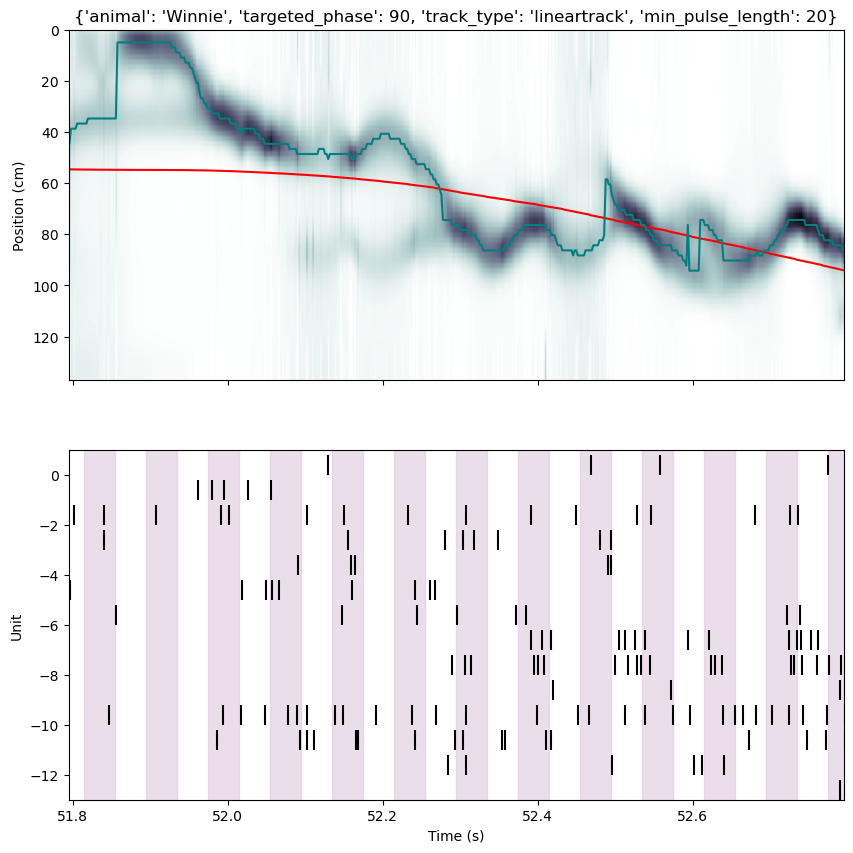

In [24]:
# pos_df
posterior.shape, pos_df.shape

t0 = pos_df.index.values[0]
# peak_ind = np.argmax(mua)
# st = pos_df.index.values[s_ind]


# st = st-t0
st = 100
t_rng = (st - 5, st + 500)

t_rng = (202.5, 203.5)

st = 1658102105.609651 - t0
st = 1658102105.60965 - t0
st = 1658102141.1814282 - t0
t_rng = st - 0.5, st + 0.6


# fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
ind = np.where(
    (pos_df.index.values >= t0 + t_rng[0]) & (pos_df.index.values < t0 + t_rng[1])
)[0]


print(ind)
ax[0].imshow(
    posterior[ind].T,
    aspect="auto",
    extent=[*t_rng, linear_pos.max(), 0],
    cmap="bone_r",
)
ax[0].plot(pos_df.index[ind].values - t0, linear_pos[ind], "r")
ax[0].plot(pos_df.index[ind].values - t0, decode_pos[ind], "teal")


stim_ind = np.where((stim_time >= t0 + t_rng[0]) & (stim_time < t0 + t_rng[1]))[0]
# for i in range(len(stim_ind)):
#     if i==0 and stim[stim_ind[i]]==0:
#         ax[0].fill_betweenx([0,linear_pos.max()], 0, stim_time[stim_ind[i]]-t0, color='thistle', alpha=0.5)
#     elif stim[stim_ind[i]]==1:
#         ax[0].fill_betweenx([0,linear_pos.max()], stim_time[stim_ind[i]]-t0, stim_time[stim_ind[i+1]]-t0, color='thistle', alpha=0.5)


ax[1].set_xlabel("Time (s)")
ax[0].set_ylabel("Position (cm)")
ax[0].set_title(dataset_key)


j = 0
for ii, s_ind in enumerate(neuron_sort_ind[::]):
    spike_times = spikes[s_ind]

    marks = (
        spike_times[
            np.logical_and(spike_times >= t0 + t_rng[0], spike_times < t0 + t_rng[1])
        ]
        - t0
    )
    if marks.size < 3:  # or marks.size>(t_rng[1]-t_rng[0])*10:
        continue
    ax[1].vlines(marks, j, j + 0.8, color="k")
    j -= 1

for i in range(len(stim_ind)):
    if i == 0 and stim[stim_ind[i]] == 0:
        # continue
        ax[1].fill_betweenx(
            [1, j + 1], 0, stim_time[stim_ind[i]] - t0, color="thistle", alpha=0.5
        )
    elif stim[stim_ind[i]] == 1:
        ax[1].fill_betweenx(
            [1, j + 1],
            stim_time[stim_ind[i]] - t0,
            stim_time[stim_ind[i + 1]] - t0,
            color="thistle",
            alpha=0.5,
        )
# ax[1].set_xlim(*t_rng)
ax[1].set_xlim(st - 0.5, st + 0.5)
ax[1].set_ylabel("Unit")
ax[1].set_ylim(j + 1, 1)

In [25]:
plt.rcParams["svg.fonttype"] = "none"
fig.savefig("./Plots/raster_example_Winnie.svg")

# Yoshi Closed Loop

In [13]:
Decoder = ClusterlessDecodingV1
Decoder = SortedSpikesDecodingV1


dataset_key = {
    "animal": "Yoshi",
    "targeted_phase": 90,
    "track_type": "lineartrack",
    "min_pulse_length": 20,
}
filter_opto_data(dataset_key)

interval = "pos 11 valid times"
nwb_file_name = "Yoshi20220513_.nwb"
encoding_tag = ""  # "_opto_control_interval"
causal_tag = ""  # "_causal"
key = {
    "nwb_file_name": nwb_file_name,
    "position_group_name": interval,
    "encoding_interval": interval + encoding_tag,
}
key = (
    (Decoder() & key)
    & f"decoding_param_name LIKE '%{causal_tag}'"
    & "sorted_spikes_group_name NOT LIKE 'manual%'"
).fetch1("KEY")

pos_df = Decoder().fetch_linear_position_info(key)
results = (Decoder() & key).fetch_results()
posterior = results.acausal_posterior.unstack("state_bins").sum("state")[0]
decode_pos = posterior.idxmax("position").values

opto_key = {
    "nwb_file_name": nwb_file_name,
    "interval_list_name": interval,
}
stim, stim_time = OptoStimProtocol().get_stimulus(opto_key)

linear_pos = pos_df["linear_position"].values

if "sorted" in Decoder.full_table_name:
    spikes = Decoder().fetch_spike_data(key)
else:
    spikes = Decoder().fetch_spike_data(key)[0]
flat_spikes = np.concatenate(spikes)
spike_inds = np.digitize(flat_spikes, pos_df.index.values)
mua = np.bincount(spike_inds, minlength=len(pos_df))
mua = smooth(mua, 5)

datasets: 2


[10:39:47][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[10:39:47][WARNING] Spyglass: Multiple classes found in stack: {'`position_merge`.`position_output`', '`position_v1_trodes_position`.`__trodes_pos_v1`'}. Please submit a bug report with the snippet used.
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/pynwb/base.py:193: UserWarning: TimeSeries 'video_frame_ind': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("%s '%s': Length of data does not match length of timestamps. Your data may be transposed. "
[10:39:49][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[10:39:49][WARNING] Spyglass: Multiple classes found in stack: {'`position_merge`.`position_output`', '`position_v1_trodes_position`.`__trodes_pos_v1`'}. Please submit a bug report with the snippet used.
[2024-05-30 10:39:55

In [81]:
opto_key = {
    "nwb_file_name": nwb_file_name,
    "interval_list_name": interval,
}
stim, stim_time = OptoStimProtocol().get_stimulus(opto_key)

[2024-05-24 09:08:03,333][WARNING]: Skipped checksum for file with hash: 1fb4cf78-9ee6-df68-2734-4b3c6f0f8e42, and path: /stelmo/nwb/raw/Yoshi20220513_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace 

In [83]:
# sort neuron ind by place field
classifier = (Decoder & key).fetch_model()
classifier.encoding_model_
for encoding_model in classifier.encoding_model_:
    place_fields = np.asarray(
        classifier.encoding_model_[encoding_model]["place_fields"]
    )
    norm_place = place_fields / np.mean(place_fields, axis=1)[:, None]
    ind_plot = np.where(norm_place.max(axis=1) > 1.5)[0]
# place_fields = np.asarray(
#     classifier.encoding_model_[encoding_model]["place_fields"]
# )
neuron_sort_ind = np.argsort(np.nanargmax(place_fields, axis=1).squeeze())
neuron_sort_ind = [x for x in neuron_sort_ind if x in ind_plot]

In [89]:
# pick good time
pos_df.speed.max()
avg_speed = []
percent_neurons = []
t_on = []

for i, state in enumerate(stim):
    if not state:
        continue
    time_rng = [stim_time[i], stim_time[i + 1]]
    # print(time_rng[1]-time_rng[0])
    ind = np.logical_and(
        pos_df.index.values > time_rng[0], pos_df.index.values < time_rng[1]
    )
    avg_speed.append(pos_df.loc[ind].speed.mean())
    percent_neurons.append(
        np.mean(
            [
                len(
                    spike_times[
                        np.logical_and(
                            spike_times >= time_rng[0], spike_times < time_rng[1]
                        )
                    ]
                )
                > 0
                for spike_times in spikes
            ]
        )
    )
    t_on.append(time_rng[0])
avg_speed = np.array(avg_speed)
percent_neurons = np.array(percent_neurons)
t_on = np.array(t_on)

In [90]:
running = avg_speed > 30

# t_sampled = 1658102105.609651
# running = np.logical_and(running,
#                          np.abs(t_on-t_sampled)>10)

loc = np.argmax(percent_neurons[running])

t_on[running][loc], avg_speed[running][loc]

(1652478915.4856071, 50.81140938274755)

[210598 210599 210600 210601 210602 210603 210604 210605 210606 210607
 210608 210609 210610 210611 210612 210613 210614 210615 210616 210617
 210618 210619 210620 210621 210622 210623 210624 210625 210626 210627
 210628 210629 210630 210631 210632 210633 210634 210635 210636 210637
 210638 210639 210640 210641 210642 210643 210644 210645 210646 210647
 210648 210649 210650 210651 210652 210653 210654 210655 210656 210657
 210658 210659 210660 210661 210662 210663 210664 210665 210666 210667
 210668 210669 210670 210671 210672 210673 210674 210675 210676 210677
 210678 210679 210680 210681 210682 210683 210684 210685 210686 210687
 210688 210689 210690 210691 210692 210693 210694 210695 210696 210697
 210698 210699 210700 210701 210702 210703 210704 210705 210706 210707
 210708 210709 210710 210711 210712 210713 210714 210715 210716 210717
 210718 210719 210720 210721 210722 210723 210724 210725 210726 210727
 210728 210729 210730 210731 210732 210733 210734 210735 210736 210737
 21073

(-13.0, 1.0)

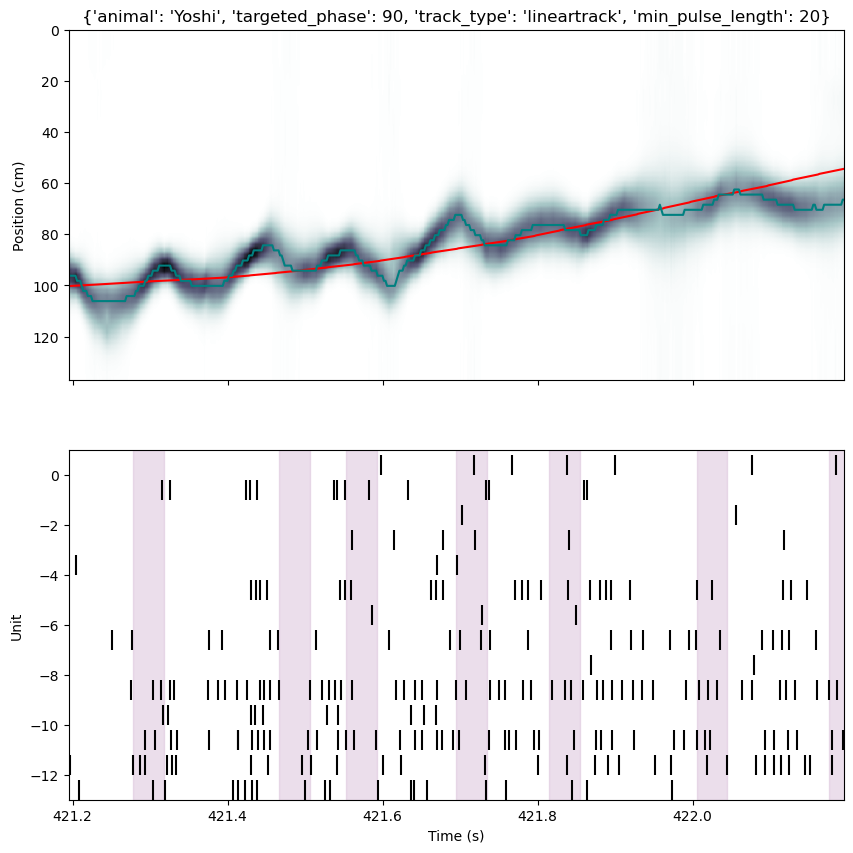

In [21]:
# pos_df
posterior.shape, pos_df.shape

t0 = pos_df.index.values[0]
# peak_ind = np.argmax(mua)
# st = pos_df.index.values[s_ind]


# st = st-t0
st = 100
t_rng = (st - 5, st + 500)

t_rng = (202.5, 203.5)

st = 1652478915.4856071 - t0

t_rng = st - 0.5, st + 0.6


# fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
ind = np.where(
    (pos_df.index.values >= t0 + t_rng[0]) & (pos_df.index.values < t0 + t_rng[1])
)[0]


print(ind)
ax[0].imshow(
    posterior[ind].T,
    aspect="auto",
    extent=[*t_rng, linear_pos.max(), 0],
    cmap="bone_r",
)
ax[0].plot(pos_df.index[ind].values - t0, linear_pos[ind], "r")
ax[0].plot(pos_df.index[ind].values - t0, decode_pos[ind], "teal")


stim_ind = np.where((stim_time >= t0 + t_rng[0]) & (stim_time < t0 + t_rng[1]))[0]
# for i in range(len(stim_ind)):
#     if i==0 and stim[stim_ind[i]]==0:
#         ax[0].fill_betweenx([0,linear_pos.max()], 0, stim_time[stim_ind[i]]-t0, color='thistle', alpha=0.2)
#     elif stim[stim_ind[i]]==1:
#         ax[0].fill_betweenx([0,linear_pos.max()], stim_time[stim_ind[i]]-t0, stim_time[stim_ind[i+1]]-t0,
#                             color='thistle', alpha=0.2)


ax[1].set_xlabel("Time (s)")
ax[0].set_ylabel("Position (cm)")
ax[0].set_title(dataset_key)


j = 0
for ii, s_ind in enumerate(neuron_sort_ind[::]):
    spike_times = spikes[s_ind]

    marks = (
        spike_times[
            np.logical_and(spike_times >= t0 + t_rng[0], spike_times < t0 + t_rng[1])
        ]
        - t0
    )
    if marks.size < 3:  # or marks.size>(t_rng[1]-t_rng[0])*10:
        continue
    ax[1].vlines(marks, j, j + 0.8, color="k")
    j -= 1

for i in range(len(stim_ind)):
    if i == 0 and stim[stim_ind[i]] == 0:
        # continue
        ax[1].fill_betweenx(
            [1, j + 1], 0, stim_time[stim_ind[i]] - t0, color="thistle", alpha=0.5
        )
    elif stim[stim_ind[i]] == 1:
        ax[1].fill_betweenx(
            [1, j + 1],
            stim_time[stim_ind[i]] - t0,
            stim_time[stim_ind[i + 1]] - t0,
            color="thistle",
            alpha=0.5,
        )
ax[1].set_xlim(*t_rng)
ax[1].set_xlim(st - 0.5, st + 0.5)
ax[1].set_ylabel("Unit")
ax[1].set_ylim(j + 1, 1)

In [22]:
plt.rcParams["svg.fonttype"] = "none"
fig.savefig("./Plots/raster_example_Yoshi.svg")

## Totoro 8Hz

In [9]:
dataset_key = {
    "animal": "Totoro",
    "period_ms": 125,
    "track_type": "lineartrack",
    "min_pulse_length": 20,
}
filter_opto_data(dataset_key)
nwb_file_name = "Totoro20220602_.nwb"
interval = "pos 7 valid times"
key = {
    "nwb_file_name": nwb_file_name,
    "position_group_name": interval,
    "encoding_interval": interval,
}
key = (SortedSpikesDecodingV1() & key).fetch1("KEY")

pos_df = SortedSpikesDecodingV1().fetch_linear_position_info(key)
results = (SortedSpikesDecodingV1() & key).fetch_results()
posterior = results.acausal_posterior.unstack("state_bins").sum("state")[0]
decode_pos = posterior.idxmax("position").values

opto_key = {
    "nwb_file_name": nwb_file_name,
    "interval_list_name": interval,
}
stim, stim_time = OptoStimProtocol().get_stimulus(opto_key)

linear_pos = pos_df["linear_position"].values

spikes = SortedSpikesDecodingV1().fetch_spike_data(key)
flat_spikes = np.concatenate(spikes)
spike_inds = np.digitize(flat_spikes, pos_df.index.values)
mua = np.bincount(spike_inds, minlength=len(pos_df))
mua = smooth(mua, 5)

# pos_df = SortedSpikesDecodingV1().fetch_linear_position_info(key)
# results = (SortedSpikesDecodingV1() & key).fetch_results()
# posterior = results.acausal_posterior.unstack("state_bins").sum("state")[0]

# opto_key = {'nwb_file_name':nwb_file_name,'interval_list_name':interval,}
# stim, stim_time = OptoStimProtocol().get_stimulus(opto_key)

# linear_pos = pos_df['linear_position'].values

[11:18:12][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False


datasets: 2


[11:18:13][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[2024-02-27 11:18:16,450][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb


Text(0.5, 1.0, "{'animal': 'Totoro', 'period_ms': 125, 'track_type': 'lineartrack', 'min_pulse_length': 20}")

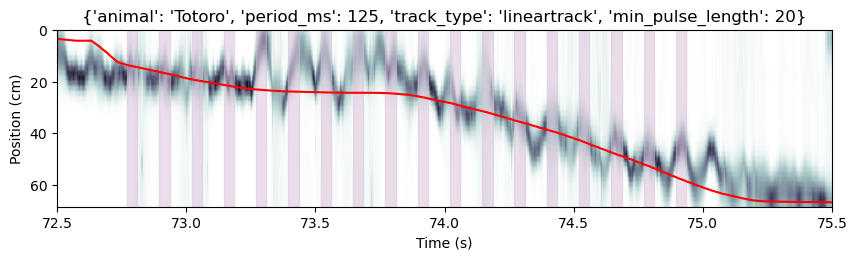

In [14]:
# pos_df
# %matplotlib qt
posterior.shape, pos_df.shape

t0 = pos_df.index.values[0]

st = 72.5  # 60*1+5
dur = 3  # 0
t_rng = (st, st + dur)

aspect = 0.01  #'auto'

fig = plt.figure(figsize=(10, 10))
ind = np.where(
    (pos_df.index.values >= t0 + t_rng[0]) & (pos_df.index.values < t0 + t_rng[1])
)[0]
plt.imshow(
    posterior[ind].T, aspect=aspect, extent=[*t_rng, linear_pos.max(), 0], cmap="bone_r"
)
plt.plot(pos_df.index[ind].values - t0, linear_pos[ind], "r")
# plt.plot(pos_df.index[ind].values-t0, decode_pos[ind], 'teal')


stim_ind = np.where((stim_time >= t0 + t_rng[0]) & (stim_time < t0 + t_rng[1]))[0]
for i in range(len(stim_ind)):
    if i == 0 and stim[stim_ind[i]] == 0:
        plt.fill_betweenx(
            [0, linear_pos.max()],
            t0,
            stim_time[stim_ind[i]] - t0,
            color="thistle",
            alpha=0.5,
        )
    elif stim[stim_ind[i]] == 1:
        plt.fill_betweenx(
            [0, linear_pos.max()],
            stim_time[stim_ind[i]] - t0,
            stim_time[stim_ind[i + 1]] - t0,
            color="thistle",
            alpha=0.5,
        )


plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.title(dataset_key)

(-65.0, 85.0)

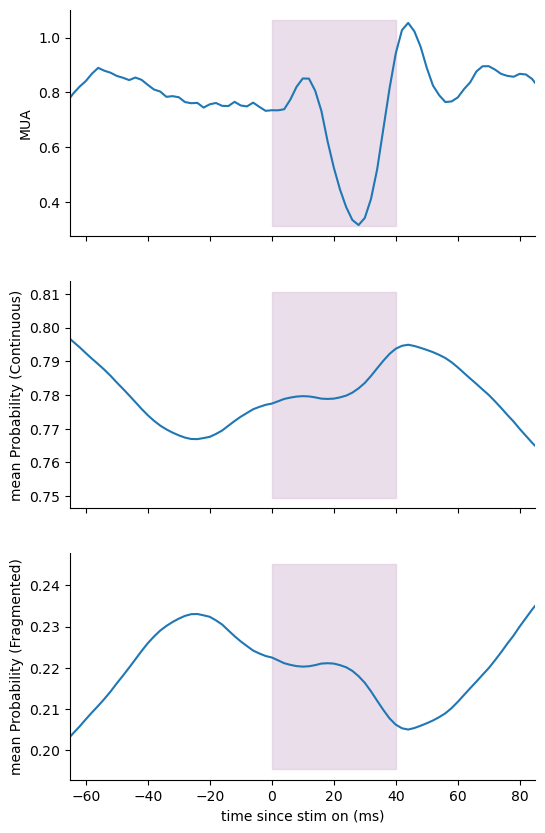

In [27]:
states = results.acausal_posterior.unstack("state_bins").state.values
state_probabilities = results.acausal_posterior.unstack("state_bins").sum("position")[0]

t_on = stim_time[stim == 1]
ind_on = np.digitize(t_on, pos_df.index.values)
plot_ind = np.arange(-70, 50, 1)

fig, ax = plt.subplots(
    nrows=state_probabilities.shape[-1] + 1, sharex=True, figsize=(6, 10)
)
for i, a in enumerate(ax[1:]):
    state_response = np.array([state_probabilities[ind + plot_ind] for ind in ind_on])
    yy = np.mean(state_response, axis=0)[:, i]
    lo = yy.min() * 0.99
    hi = yy.max() * 1.01
    a.plot(plot_ind * 2, yy)
    a.set_ylabel(f"mean Probability ({states[i]})")
    a.fill_between([0, 40], [lo] * 2, [hi] * 2, color="thistle", alpha=0.5)

# add mua
mua_plot = np.array([mua[ind + plot_ind] for ind in ind_on])
yy = np.mean(mua_plot, axis=0)
lo = yy.min() * 0.99
hi = yy.max() * 1.01
ax[0].plot(plot_ind * 2, yy)
# ax[0].fill_between(plot_ind*2,[lo]*len(plot_ind),[hi]*len(plot_ind), color='thistle', alpha=0.5)
ax[0].set_ylabel("MUA")
ax[0].fill_between([0, 40], [lo] * 2, [hi] * 2, color="thistle", alpha=0.5)
ax[0].fill_between([-125, -85], [lo] * 2, [hi] * 2, color="thistle", alpha=0.5)


for a in ax:
    a.spines[["top", "right"]].set_visible(False)
plt.xlabel("time since stim on (ms)")
plt.xlim(-65, 85)
# plt.title('dataset_key')
# plt.

# Totoro 10 Hz

In [35]:
dataset_key = {
    "animal": "Totoro",
    "period_ms": 100,
    "track_type": "lineartrack",
    "min_pulse_length": 20,
}
filter_opto_data(dataset_key)
nwb_file_name = "Totoro20220603_.nwb"
interval = "pos 9 valid times"
key = {
    "nwb_file_name": nwb_file_name,
    "position_group_name": interval,
    "encoding_interval": interval,
}
key = (SortedSpikesDecodingV1() & key).fetch1("KEY")

pos_df = SortedSpikesDecodingV1().fetch_linear_position_info(key)
results = (SortedSpikesDecodingV1() & key).fetch_results()
posterior = results.acausal_posterior.unstack("state_bins").sum("state")[0]
decode_pos = posterior.idxmax("position").values

opto_key = {
    "nwb_file_name": nwb_file_name,
    "interval_list_name": interval,
}
stim, stim_time = OptoStimProtocol().get_stimulus(opto_key)

linear_pos = pos_df["linear_position"].values

spikes = SortedSpikesDecodingV1().fetch_spike_data(key)
flat_spikes = np.concatenate(spikes)
spike_inds = np.digitize(flat_spikes, pos_df.index.values)
mua = np.bincount(spike_inds, minlength=len(pos_df))
mua = smooth(mua, 5)

[11:29:33][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False


datasets: 2


/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/pynwb/base.py:193: UserWarning: TimeSeries 'video_frame_ind': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("%s '%s': Length of data does not match length of timestamps. Your data may be transposed. "
[11:29:34][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[2024-02-27 11:29:37,599][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/

Text(0.5, 1.0, "{'animal': 'Totoro', 'period_ms': 100, 'track_type': 'lineartrack', 'min_pulse_length': 20}")

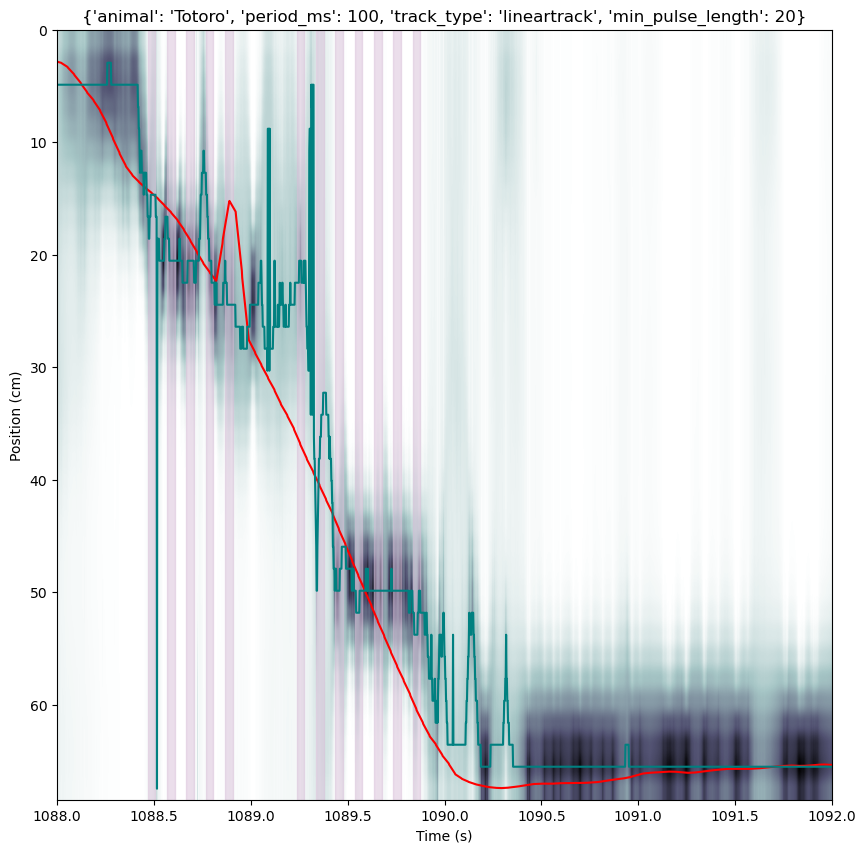

In [43]:
# pos_df
# %matplotlib qt
posterior.shape, pos_df.shape

t0 = pos_df.index.values[0]

st = 1088  # 18*60#60*1+5
dur = 4  # 20
t_rng = (st, st + dur)

aspect = "auto"

fig = plt.figure(figsize=(10, 10))
ind = np.where(
    (pos_df.index.values >= t0 + t_rng[0]) & (pos_df.index.values < t0 + t_rng[1])
)[0]
plt.imshow(
    posterior[ind].T, aspect=aspect, extent=[*t_rng, linear_pos.max(), 0], cmap="bone_r"
)
plt.plot(pos_df.index[ind].values - t0, linear_pos[ind], "r")
plt.plot(pos_df.index[ind].values - t0, decode_pos[ind], "teal")


stim_ind = np.where((stim_time >= t0 + t_rng[0]) & (stim_time < t0 + t_rng[1]))[0]
for i in range(len(stim_ind)):
    if i == 0 and stim[stim_ind[i]] == 0:
        plt.fill_betweenx(
            [0, linear_pos.max()],
            t0,
            stim_time[stim_ind[i]] - t0,
            color="thistle",
            alpha=0.5,
        )
    elif stim[stim_ind[i]] == 1:
        plt.fill_betweenx(
            [0, linear_pos.max()],
            stim_time[stim_ind[i]] - t0,
            stim_time[stim_ind[i + 1]] - t0,
            color="thistle",
            alpha=0.5,
        )


plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.title(dataset_key)

(-65.0, 85.0)

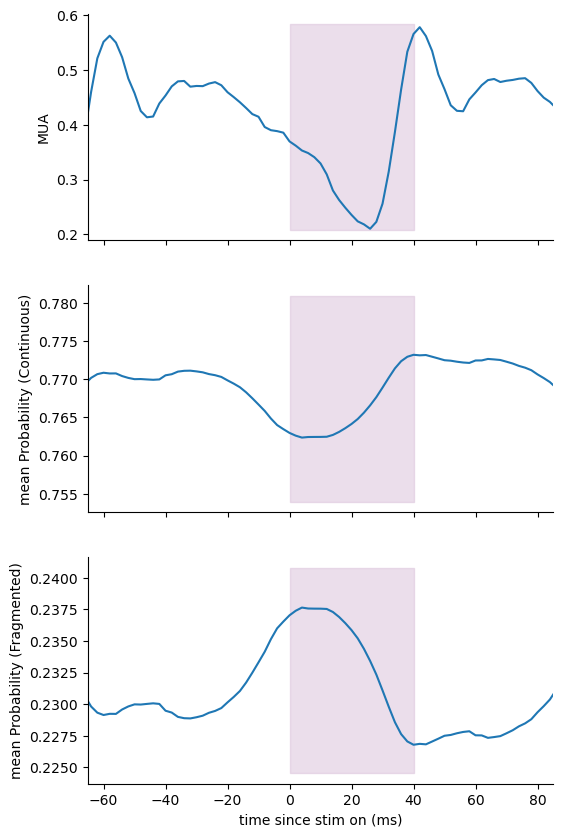

In [44]:
states = results.acausal_posterior.unstack("state_bins").state.values
state_probabilities = results.acausal_posterior.unstack("state_bins").sum("position")[0]

t_on = stim_time[stim == 1]
ind_on = np.digitize(t_on, pos_df.index.values)
plot_ind = np.arange(-70, 50, 1)

fig, ax = plt.subplots(
    nrows=state_probabilities.shape[-1] + 1, sharex=True, figsize=(6, 10)
)
for i, a in enumerate(ax[1:]):
    state_response = np.array([state_probabilities[ind + plot_ind] for ind in ind_on])
    yy = np.mean(state_response, axis=0)[:, i]
    lo = yy.min() * 0.99
    hi = yy.max() * 1.01
    a.plot(plot_ind * 2, yy)
    a.set_ylabel(f"mean Probability ({states[i]})")
    a.fill_between([0, 40], [lo] * 2, [hi] * 2, color="thistle", alpha=0.5)

# add mua
mua_plot = np.array([mua[ind + plot_ind] for ind in ind_on])
yy = np.mean(mua_plot, axis=0)
lo = yy.min() * 0.99
hi = yy.max() * 1.01
ax[0].plot(plot_ind * 2, yy)
# ax[0].fill_between(plot_ind*2,[lo]*len(plot_ind),[hi]*len(plot_ind), color='thistle', alpha=0.5)
ax[0].set_ylabel("MUA")
ax[0].fill_between([0, 40], [lo] * 2, [hi] * 2, color="thistle", alpha=0.5)
ax[0].fill_between([-125, -85], [lo] * 2, [hi] * 2, color="thistle", alpha=0.5)


for a in ax:
    a.spines[["top", "right"]].set_visible(False)
plt.xlabel("time since stim on (ms)")
plt.xlim(-65, 85)
# plt.title('dataset_key')
# plt.